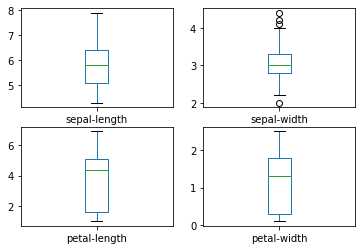

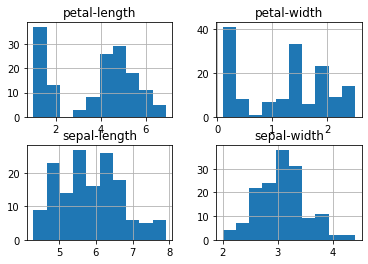

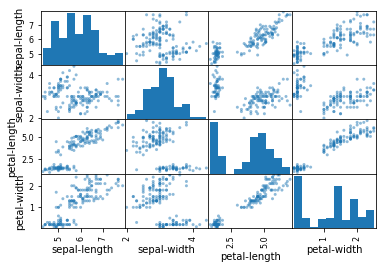

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.945513 (0.060355)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


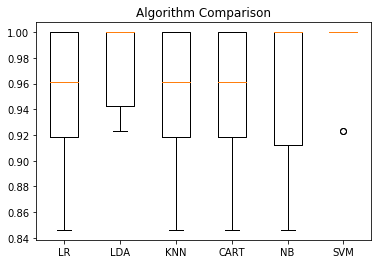

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Time to complete the function process in seconds: 1.8007240295410156


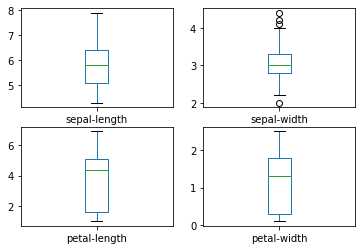

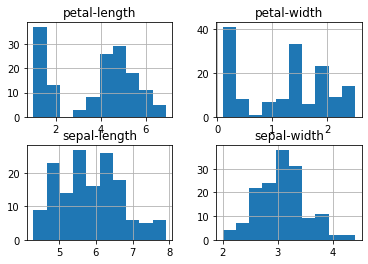

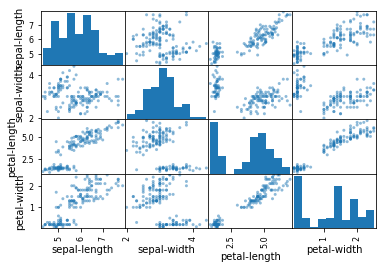

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.945513 (0.060355)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


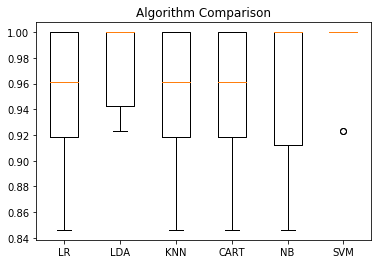

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Time to complete the function process in seconds: 1.5977809429168701


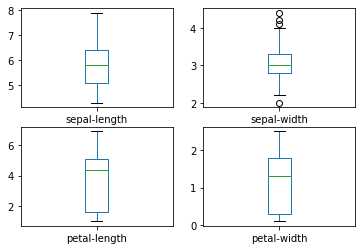

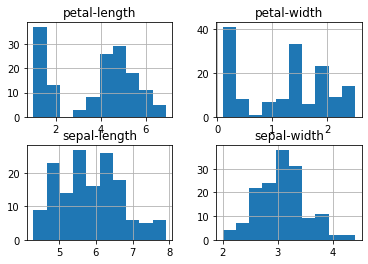

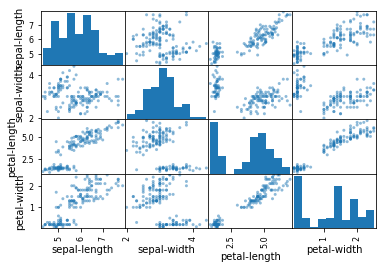

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.953205 (0.061888)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


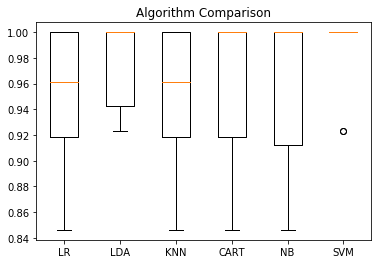

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Time to complete the function process in seconds: 1.6242859363555908


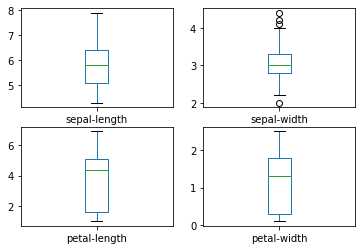

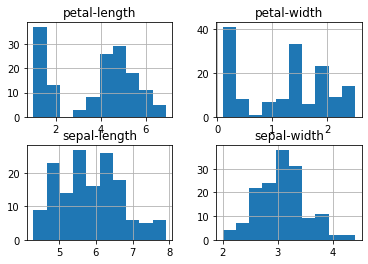

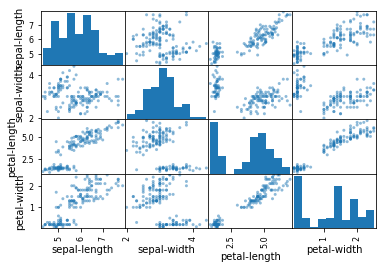

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.953205 (0.061888)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


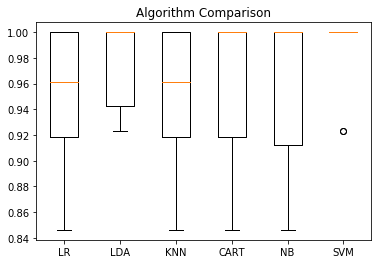

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Time to complete the function process in seconds: 1.6077921390533447


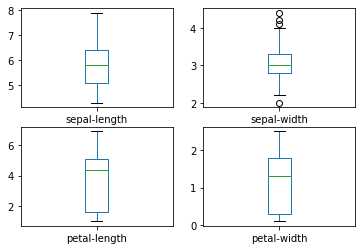

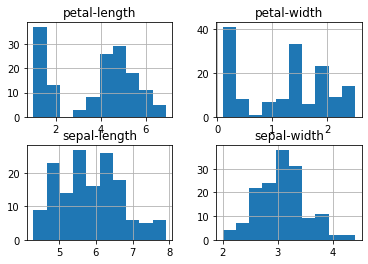

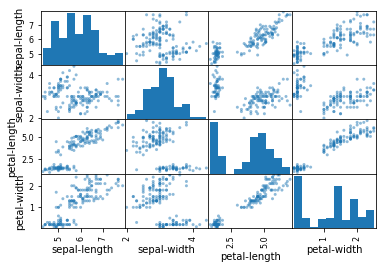

LR: 0.951807 (0.052427)
LDA: 0.976923 (0.035251)
KNN: 0.951807 (0.052427)
CART: 0.953205 (0.061888)
NB: 0.952448 (0.062375)
SVM: 0.984615 (0.030769)


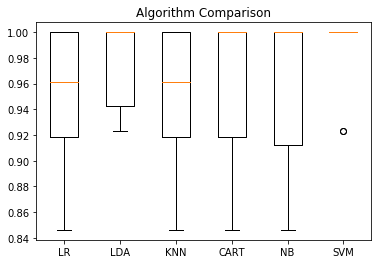

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Time to complete the function process in seconds: 2.3255701065063477
         2970447 function calls (2912340 primitive calls) in 2.325 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2282    0.001    0.000    0.017    0.000 <__array_function__ internals>:2(all)
     9126    0.004    0.000    0.051    0.000 <__array_function__ internals>:2(amax)
     9057    0.005    0.000    0.057    0.000 <__array_function__ internals>:2(amin)
     5855    0.004    0.000    0.053    0

        2    0.000    0.000    0.001    0.000 _split.py:1429(_iter_indices)
        2    0.000    0.000    0.000    0.000 _split.py:1718(_validate_shuffle_split)
        6    0.000    0.000    0.000    0.000 _split.py:1940(check_cv)
        1    0.000    0.000    0.001    0.001 _split.py:1998(train_test_split)
        3    0.000    0.000    0.000    0.000 _split.py:2123(<genexpr>)
       24    0.000    0.000    0.000    0.000 _split.py:281(__init__)
   264/66    0.000    0.000    0.012    0.000 _split.py:303(split)
       18    0.000    0.000    0.000    0.000 _split.py:428(__init__)
      198    0.000    0.000    0.001    0.000 _split.py:435(_iter_test_indices)
        6    0.000    0.000    0.000    0.000 _split.py:627(__init__)
   264/66    0.001    0.000    0.012    0.000 _split.py:63(split)
        6    0.003    0.001    0.011    0.002 _split.py:633(_make_test_folds)
        6    0.000    0.000    0.000    0.000 _split.py:666(<listcomp>)
       66    0.000    0.000    0.012    0.0

        8    0.000    0.000    0.000    0.000 backend_bases.py:1889(draw)
        4    0.000    0.000    0.000    0.000 backend_bases.py:1939(_get_output_canvas)
        4    0.001    0.000    1.147    0.287 backend_bases.py:1958(print_figure)
       28    0.000    0.000    0.000    0.000 backend_bases.py:2141(mpl_connect)
        4    0.000    0.000    0.000    0.000 backend_bases.py:2189(mpl_disconnect)
        4    0.000    0.000    0.000    0.000 backend_bases.py:2482(__init__)
       25    0.000    0.000    0.000    0.000 backend_bases.py:2500(notify_axes_change)
        4    0.000    0.000    0.000    0.000 backend_bases.py:2515(destroy)
        4    0.000    0.000    0.001    0.000 backend_bases.py:3244(new_figure_manager)
        4    0.000    0.000    0.000    0.000 backend_bases.py:3254(new_figure_manager_given_figure)
      180    0.000    0.000    0.000    0.000 backend_bases.py:635(flipy)
      970    0.001    0.000    0.011    0.000 backend_bases.py:654(new_gc)
      970 

        1    0.000    0.000    0.000    0.000 client.py:944(close)
        1    0.000    0.000    0.065    0.065 client.py:958(send)
        5    0.000    0.000    0.000    0.000 client.py:996(_output)
       24    0.000    0.000    0.000    0.000 cm.py:155(get_cmap)
       12    0.000    0.000    0.000    0.000 cm.py:193(__init__)
       72    0.000    0.000    0.000    0.000 collections.py:171(get_transforms)
       48    0.000    0.000    0.000    0.000 collections.py:174(get_offset_transform)
       24    0.000    0.000    0.013    0.001 collections.py:181(get_datalim)
       12    0.000    0.000    0.005    0.000 collections.py:207(get_window_extent)
       24    0.000    0.000    0.001    0.000 collections.py:212(_prepare_points)
       24    0.000    0.000    0.017    0.001 collections.py:249(draw)
       12    0.000    0.000    0.000    0.000 collections.py:335(set_pickradius)
       12    0.000    0.000    0.000    0.000 collections.py:378(set_urls)
       12    0.000    0.000

       25    0.000    0.000    0.001    0.000 figure.py:108(bubble)
       25    0.000    0.000    0.000    0.000 figure.py:1091(fixlist)
       25    0.000    0.000    0.000    0.000 figure.py:1102(_process_projection_requirements)
       25    0.000    0.000    0.000    0.000 figure.py:115(add)
       25    0.000    0.000    0.305    0.012 figure.py:1261(add_subplot)
       25    0.000    0.000    0.001    0.000 figure.py:1418(_add_axes_internal)
      184    0.000    0.000    0.000    0.000 figure.py:145(current_key_axes)
      182    0.000    0.000    0.000    0.000 figure.py:157(__call__)
       25    0.000    0.000    0.000    0.000 figure.py:160(__contains__)
        4    0.000    0.000    0.000    0.000 figure.py:1624(clf)
        8    0.000    0.000    0.499    0.062 figure.py:1661(draw)
       58    0.000    0.000    0.000    0.000 figure.py:1675(<genexpr>)
       50    0.000    0.000    0.000    0.000 figure.py:1676(<lambda>)
        4    0.000    0.000    0.000    0.000 fig

        4    0.000    0.000    0.000    0.000 hmac.py:136(hexdigest)
       16    0.000    0.000    0.000    0.000 hmac.py:99(update)
        2    0.000    0.000    0.000    0.000 idna.py:147(encode)
     58/8    0.001    0.000    0.495    0.062 image.py:117(_draw_list_compositing_images)
      882    0.000    0.000    0.000    0.000 image.py:127(<genexpr>)
       10    0.000    0.000    0.000    0.000 index_tricks.py:636(__init__)
       10    0.000    0.000    0.000    0.000 index_tricks.py:644(__iter__)
      130    0.000    0.000    0.000    0.000 index_tricks.py:655(__next__)
       15    0.000    0.000    0.000    0.000 indexers.py:13(is_list_like_indexer)
        1    0.000    0.000    0.000    0.000 indexers.py:161(maybe_convert_indices)
        5    0.000    0.000    0.000    0.000 indexers.py:29(is_scalar_indexer)
        5    0.000    0.000    0.000    0.000 indexers.py:39(is_empty_indexer)
        5    0.000    0.000    0.000    0.000 indexers.py:65(check_setitem_lengths)
 

       28    0.000    0.000    0.000    0.000 numeric.py:47(__new__)
       28    0.000    0.000    0.002    0.000 numeric.py:82(_shallow_copy)
       10    0.000    0.000    0.000    0.000 numeric.py:93(_zeros_like_dispatcher)
       10    0.000    0.000    0.000    0.000 numeric.py:97(zeros_like)
      988    0.001    0.000    0.001    0.000 numerictypes.py:293(issubclass_)
      494    0.001    0.000    0.002    0.000 numerictypes.py:365(issubdtype)
        2    0.000    0.000    0.000    0.000 numerictypes.py:578(_can_coerce_all)
       19    0.000    0.000    0.000    0.000 numerictypes.py:587(<listcomp>)
        1    0.000    0.000    0.000    0.000 numerictypes.py:602(find_common_type)
        1    0.000    0.000    0.000    0.000 numerictypes.py:654(<listcomp>)
        1    0.000    0.000    0.000    0.000 numerictypes.py:655(<listcomp>)
       57    0.000    0.000    0.001    0.000 numpy_.py:122(__init__)
       29    0.000    0.000    0.000    0.000 numpy_.py:165(__array__)
 

        6    0.000    0.000    0.000    0.000 sparse.py:223(construct_from_string)
      630    0.001    0.000    0.002    0.000 spines.py:140(get_patch_transform)
      300    0.003    0.000    0.074    0.000 spines.py:147(get_window_extent)
      630    0.000    0.000    0.000    0.000 spines.py:205(get_path)
3292/3092    0.001    0.000    0.003    0.000 spines.py:208(_ensure_position_is_set)
      100    0.000    0.000    0.011    0.000 spines.py:214(register_axis)
      100    0.000    0.000    0.011    0.000 spines.py:226(cla)
      500    0.002    0.000    0.003    0.000 spines.py:254(_adjust_location)
      100    0.001    0.000    0.013    0.000 spines.py:34(__init__)
      200    0.000    0.000    0.022    0.000 spines.py:362(draw)
      100    0.000    0.000    0.000    0.000 spines.py:369(_calc_offset_transform)
      100    0.000    0.000    0.002    0.000 spines.py:443(set_position)
3192/3092    0.005    0.000    0.009    0.000 spines.py:487(get_spine_transform)
      100 

     3471    0.004    0.000    0.022    0.000 transforms.py:357(xmax)
     3986    0.005    0.000    0.027    0.000 transforms.py:362(ymax)
     1852    0.002    0.000    0.002    0.000 transforms.py:377(intervalx)
     2085    0.002    0.000    0.002    0.000 transforms.py:386(intervaly)
     2397    0.002    0.000    0.002    0.000 transforms.py:395(width)
     1148    0.001    0.000    0.001    0.000 transforms.py:401(height)
        8    0.000    0.000    0.000    0.000 transforms.py:407(size)
  805/801    0.003    0.000    0.005    0.000 transforms.py:413(bounds)
      752    0.000    0.000    0.002    0.000 transforms.py:419(extents)
       24    0.000    0.000    0.001    0.000 transforms.py:508(transformed)
       24    0.000    0.000    0.002    0.000 transforms.py:517(inverse_transformed)
       14    0.000    0.000    0.000    0.000 transforms.py:666(padded)
      849    0.006    0.000    0.012    0.000 transforms.py:671(translated)
      817    0.005    0.000    0.105    0.

        4    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_1d_int64_int64}
        1    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_1d_object_object}
        1    0.000    0.000    0.000    0.000 {pandas._libs.algos.take_2d_axis0_float64_float64}
        5    0.000    0.000    0.000    0.000 {pandas._libs.internals.get_blkno_placements}
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.array_equivalent_object}
        7    0.000    0.000    0.000    0.000 {pandas._libs.lib.clean_index_list}
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.get_reverse_indexer}
        9    0.000    0.000    0.000    0.000 {pandas._libs.lib.infer_datetimelike_array}
       62    0.000    0.000    0.001    0.000 {pandas._libs.lib.infer_dtype}
       61    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_bool}
      107    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_float}
       83    0.000    0.000    0.000    0.000 {pandas._libs.lib.i

In [9]:
# Load all the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import logging
import time
import cProfile

def model_predict(test,loglevel):
    
    # Start time of the function
    start_time = time.time()
        
    p = cProfile.Profile()

    # Enable profiling
    if test=="profile":
        p.enable()
    
    logger = logging.getLogger()
    if loglevel=="debug":
        logger.setLevel(logging.DEBUG)
    elif loglevel=="info":
        logger.setLevel(logging.INFO)
    elif loglevel=="warn":
        logger.setLevel(logging.WARNING)
    elif loglevel=="error":
        logger.setLevel(logging.ERROR)
    elif loglevel=="critical":
        logger.setLevel(logging.CRITICAL)
    else:
        logger.setLevel(logging.INFO)
        
    logger.info("Model compare and prediction START!")
    if test is None:
        logger.warning("Testmode is empty")
    elif loglevel is None:
        logger.warning("Kog level not set default to info")
    
    # Load the dataset
    url = "https://github.com/prahul/capstone-ai-production/blob/master/iris.csv"
    logger.debug("Loading data from: %s", url )
    if url == "":
        logger.critical("No location specfied for data file")
    sepalname = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
    dataset = read_csv(url, names=sepalname)
    logger.info("Dataset loaded successfully")
    

    # draw box and whisker plots
    dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
    pyplot.show()
    logger.info("Plot drawn successfully")


    # draw histograms
    dataset.hist()
    pyplot.show()
    logger.info("Plot drawn successfully")


    # draw scatter plot matrix
    scatter_matrix(dataset)
    pyplot.show()
    logger.info("Scatter plot matrix drawn successfully")


    # Split the validation dataset
    array = dataset.values
    X = array[:,0:4]
    y = array[:,4]
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
    logger.debug("X_train: %s", X_train)
    logger.debug("X_validation: %s", X_validation)
    logger.debug("Y_train: %s", Y_train)
    logger.debug("Y_validation: %s", Y_validation)
    if X_train is None:
        logger.error("X_train value empty")
    elif X_validation is None:
        logger.error("X_validation value empty")
    elif Y_train is None:
        logger.error("Y_train value empty")
    elif Y_validation is None:
        logger.error("Y_validation value empty")
    else:
        logger.info("Validation dataset split successfully")
    

    # Check Algorithms
    mlmodels = []
    mlmodels.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    mlmodels.append(('LDA', LinearDiscriminantAnalysis()))
    mlmodels.append(('KNN', KNeighborsClassifier()))
    mlmodels.append(('CART', DecisionTreeClassifier()))
    mlmodels.append(('NB', GaussianNB()))
    mlmodels.append(('SVM', SVC(gamma='auto')))
    
    logger.debug("Models: %s", mlmodels)
    logger.info("Check algorithms successfully")
    # evaluate each model in turn
    modelresults = []
    sepalname = []
    for name, model in mlmodels:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_modelresults = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        modelresults.append(cv_modelresults)
        sepalname.append(name)
        print('%s: %f (%f)' % (name, cv_modelresults.mean(), cv_modelresults.std()))
    

    # Compare Algorithms
    logger.debug("Models results: %s", modelresults)
    if modelresults is None:
        logger.debug("No data found for model results")
        
    pyplot.boxplot(modelresults, labels=sepalname)
    pyplot.title('Algorithm Comparison')
    pyplot.show()
    logger.info("Algorithm compare success")

    # Make predictions on validation dataset
    logger.debug("X_train: %s", X_train)
    logger.debug("Y_train: %s", Y_train)
    model = SVC(gamma='auto')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    logger.info("Make prediction success")


    # Evaluate predictions
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    logger.info("Prediction eveluation complete")
    
    # End time of the function after the the code to be evaluated
    end_time = time.time()

    # Time taken in seconds to complete the entire process.
    time_taken = end_time - start_time
    print("Time to complete the function process in seconds:", time_taken)
    

    # Disable profiling
    if test=="profile":
        p.disable()

        # Print the stats
        p.print_stats()

        # Dump the stats to a file
        p.dump_stats("capprojresults.prof") 
    
    logger.info("Model compare and prediction COMPLETE!")
    
# Unit test api and logging   
model_predict("false","info")
model_predict("false","debug")
model_predict("false","warn")
model_predict("false","error")
model_predict("profile","critical")